In [1]:
# Data imports
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # ML imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from models.lstm import Lstm
from models.gru import Gru
#import pre-defined confusion matrix funcion
from models.confusionMatrix import ConfusionMatrix

2023-04-11 16:21:34.432898: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# read data
df = pd.read_csv("apis/tweet_data.csv")

# sample data
df = df.sample(frac=1).reset_index(drop=True)

# clean tweet text
df['Text'] = df['Text'].apply(lambda x: x.lower())  # transform text to lowercase
df['Text'] = df['Text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
print(df.shape)
df.head(10)

(5791, 2)


,Text,Sentiment
0,an no serious resistance till 1000 1017 just ...,1
1,zoom long 76 looking for continuationmomo,1
2,twx ong 3859 trailing stop 4471 from 4 prio...,1
3,us crude prices are on track to hit a new 18ye...,-1
4,jpm breaking higher from the tight consolidati...,1
5,dont shoot the mailman point figure target aa...,-1
6,vxy another ong bpop snort 9s next week on vxy...,1
7,dndn turning green bull hammer close,1
8,ceg ooking to add to soon,1
9,aap emember last friday in the last 5 minutes ...,-1


<AxesSubplot:>

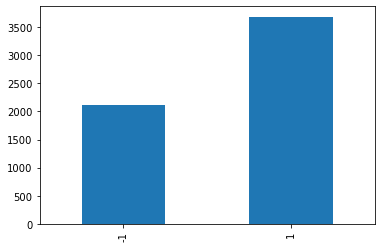

In [3]:
df['Sentiment'].value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

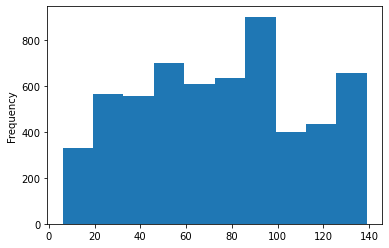

In [4]:
df['Text'].str.len().plot.hist()

In [5]:
# X as tokenize data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Text'].values)
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X)
print("X tokenized data = ", X[:5])

X tokenized data =  [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   68   70 1553  127  521  827 4776   65
   201  720  273]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0 2065   33 1231
    87    7 4777]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0 1778   71 4778  392   49 4779   19  158  438  247    6 4780 4781
  4782    9 4783]
 [   0    0    0    0    0    0    0    0  130  721  212   30    4 3238
     2  217    3   47 2530  124  361 1554    1 1123   69    4 1379    7
   164 4784 4785]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0  260  151   60   19    1  496
   376   61 1015]]


In [6]:
# Y as buckets of Sentiment column
y = pd.get_dummies(df['Sentiment']).values
[print(df['Sentiment'][i], y[i]) for i in range(10, 20)]

-1 [1 0]
1 [0 1]
-1 [1 0]
1 [0 1]
1 [0 1]
1 [0 1]
-1 [1 0]
1 [0 1]
-1 [1 0]
1 [0 1]


[None, None, None, None, None, None, None, None, None, None]

In [62]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# lstm model build
lstm = Lstm()
lstm.build_model(X.shape[1])

2023-04-11 16:21:45.160972: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 256)           1280000   
                                                                 
 dropout (Dropout)           (None, 31, 256)           0         
                                                                 
 lstm (LSTM)                 (None, 31, 256)           525312    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 2)                 514       
                                                                 
Total params: 2,331,138
Trainable params: 2,331,138
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = lstm.train(X_train, y_train)

Epoch 1/8
145/145 - 76s - loss: 0.5828 - accuracy: 0.6893 - 76s/epoch - 525ms/step
Epoch 2/8
145/145 - 71s - loss: 0.3640 - accuracy: 0.8396 - 71s/epoch - 491ms/step
Epoch 3/8
145/145 - 75s - loss: 0.2274 - accuracy: 0.9048 - 75s/epoch - 515ms/step
Epoch 4/8
145/145 - 60s - loss: 0.1420 - accuracy: 0.9447 - 60s/epoch - 412ms/step
Epoch 5/8
145/145 - 59s - loss: 0.0955 - accuracy: 0.9635 - 59s/epoch - 410ms/step
Epoch 6/8
145/145 - 64s - loss: 0.0590 - accuracy: 0.9788 - 64s/epoch - 441ms/step
Epoch 7/8
145/145 - 62s - loss: 0.0414 - accuracy: 0.9821 - 62s/epoch - 428ms/step
Epoch 8/8
145/145 - 57s - loss: 0.0391 - accuracy: 0.9864 - 57s/epoch - 393ms/step


In [45]:
predictions = lstm.predict(X_test)
avg_neg = np.mean([prediction[0] for prediction in predictions])
avg_pos = np.mean([prediction[1] for prediction in predictions])
print(f"LSTM model: \nAverage negative sentiment score = {avg_neg}\nAverage positive sentiment score = {avg_pos}")

37/37 [==============================] - 3s 83ms/step
LSTM model: 
Average negative sentiment score = 0.3613467514514923
Average positive sentiment score = 0.6386532187461853


In [63]:
#C M
y_test_1d = y_test[:,0]
y_pred = predictions.round()[:,0]
print('Confusion Mtrix Evaluation for LSTM')
ConfusionMatrix(y_test_1d,y_pred)

Confusion Mtrix Evaluation for LSTM
Confusion Matrix:
 [[575 136]
 [162 286]]
Accuracy: 0.7428817946505608
Recall: 0.6383928571428571
Precision: 0.6777251184834123
F1 Score: 0.6574712643678161


In [64]:
pos_count, neg_count = 0, 0
real_pos, real_neg = 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==1:
        pos_count += 1
    else:
        neg_count += 1
    if np.argmax(y_test[i])==1:    
        real_pos += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Negative predictions:', neg_count)

print('Real positive:', real_pos)
print('Real negative:', real_neg)

Positive predictions: 737
Negative predictions: 422
Real positive: 711
Real negative: 448


In [65]:
print(history.history['loss'], )
predictions = [pos_count, neg_count]
real = [real_pos, real_neg]
labels = ['Positive', 'Negative']

[0.5827926993370056, 0.3640258312225342, 0.2273852676153183, 0.14198748767375946, 0.09546530991792679, 0.05896330252289772, 0.0413682796061039, 0.03908681496977806]


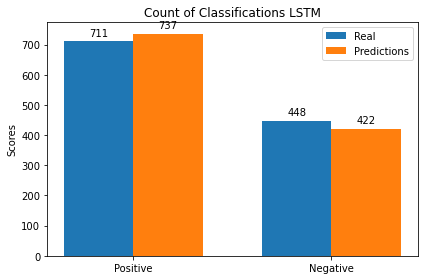

In [66]:
x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, real, width, label='Real')
rects2 = ax.bar(x + width/2, predictions, width, label='Predictions')

ax.set_ylabel('Scores')
ax.set_title('Count of Classifications LSTM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

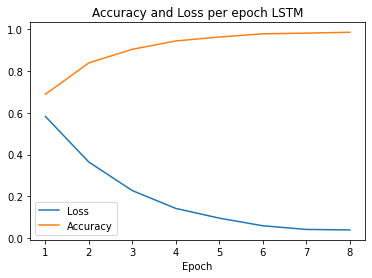

In [67]:
fig, ax = plt.subplots()
loss = history.history['loss']
epoch = [item for item in range(1,9)]
accuracy = history.history['accuracy']
ax.plot(epoch, loss, label = "Loss")
ax.plot(epoch, accuracy, label = "Accuracy")

ax.set_xlabel('Epoch')
ax.set_title('Accuracy and Loss per epoch LSTM')
plt.legend()
plt.show()

In [69]:
# gru model build
gru = Gru()
gru.build_model(X.shape[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 31, 256)           1280000   
                                                                 
 dropout_1 (Dropout)         (None, 31, 256)           0         
                                                                 
 gru (GRU)                   (None, 31, 256)           394752    
                                                                 
 gru_1 (GRU)                 (None, 256)               394752    
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 2,070,018
Trainable params: 2,070,018
Non-trainable params: 0
_________________________________________________________________


In [70]:
history = gru.train(X_train, y_train)

Epoch 1/8
145/145 - 49s - loss: 0.5771 - accuracy: 0.6982 - 49s/epoch - 335ms/step
Epoch 2/8
145/145 - 48s - loss: 0.3482 - accuracy: 0.8497 - 48s/epoch - 328ms/step
Epoch 3/8
145/145 - 50s - loss: 0.2123 - accuracy: 0.9147 - 50s/epoch - 342ms/step
Epoch 4/8
145/145 - 50s - loss: 0.1213 - accuracy: 0.9532 - 50s/epoch - 344ms/step
Epoch 5/8
145/145 - 49s - loss: 0.0803 - accuracy: 0.9698 - 49s/epoch - 341ms/step
Epoch 6/8
145/145 - 51s - loss: 0.0596 - accuracy: 0.9784 - 51s/epoch - 350ms/step
Epoch 7/8
145/145 - 50s - loss: 0.0431 - accuracy: 0.9829 - 50s/epoch - 342ms/step
Epoch 8/8
145/145 - 50s - loss: 0.0389 - accuracy: 0.9853 - 50s/epoch - 343ms/step


In [71]:
predictions = gru.predict(X_test)
avg_neg = np.mean([prediction[0] for prediction in predictions])
avg_pos = np.mean([prediction[1] for prediction in predictions])
print(f"GRU model: \nAverage negative sentiment score = {avg_neg}\nAverage positive sentiment score = {avg_pos}")

37/37 [==============================] - 3s 59ms/step
GRU model: 
Average negative sentiment score = 0.3819880783557892
Average positive sentiment score = 0.6180118918418884


In [73]:
#Confusion Matrix
y_pred = predictions.round()[:,0]
print('Confusion Matrix Evaluation for GRU')
ConfusionMatrix(y_test_1d,y_pred)

Confusion Matrix Evaluation for GRU
Confusion Matrix:
 [[568 143]
 [151 297]]
Accuracy: 0.7463330457290768
Recall: 0.6629464285714286
Precision: 0.675
F1 Score: 0.668918918918919


In [74]:
pos_count, neg_count = 0, 0
real_pos, real_neg = 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==1:
        pos_count += 1
    else:
        neg_count += 1
    if np.argmax(y_test[i])==1:    
        real_pos += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Negative predictions:', neg_count)

print('Real positive:', real_pos)
print('Real negative:', real_neg)

Positive predictions: 719
Negative predictions: 440
Real positive: 711
Real negative: 448


In [75]:
print(history.history['loss'], )
predictions = [pos_count, neg_count]
real = [real_pos, real_neg]
labels = ['Positive', 'Negative']

[0.5771182775497437, 0.3481897711753845, 0.21228039264678955, 0.12133686244487762, 0.08034484088420868, 0.05959104746580124, 0.04307669773697853, 0.03891975060105324]


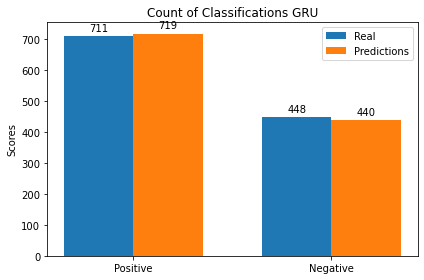

In [76]:
x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, real, width, label='Real')
rects2 = ax.bar(x + width/2, predictions, width, label='Predictions')

ax.set_ylabel('Scores')
ax.set_title('Count of Classifications GRU')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

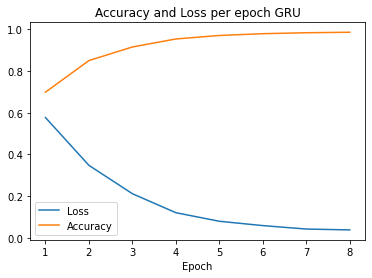

In [77]:
fig, ax = plt.subplots()
loss = history.history['loss']
epoch = [item for item in range(1,9)]
accuracy = history.history['accuracy']
ax.plot(epoch, loss, label = "Loss")
ax.plot(epoch, accuracy, label = "Accuracy")

ax.set_xlabel('Epoch')
ax.set_title('Accuracy and Loss per epoch GRU')
plt.legend()
plt.show()

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.2, random_state=0)
kfold = KFold()

In [84]:
#Random foreast model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
print('Avg cross val score:', cross_val_score(rf, X_train, y_train, cv=kfold).mean())
print('parameters:',rf.get_params())

Avg cross val score: 0.655656207697559
parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [85]:
y_pred = rf.predict(X_test)
print('Confusion Mtrix Evaluation for Random Foreast')
ConfusionMatrix(y_test,y_pred)

Confusion Mtrix Evaluation for Random Foreast
Confusion Matrix:
 [[ 64 384]
 [ 43 668]]
Accuracy: 0.631578947368421
Recall: 0.939521800281294
Precision: 0.6349809885931559
F1 Score: 0.7577992058990358


In [86]:
#SVM model
svm = SVC(random_state=0)
svm.fit(X_train, y_train)
print('Avg cross val score:', cross_val_score(svm, X_train, y_train, cv=kfold).mean())
print('parameters:',svm.get_params())

Avg cross val score: 0.6405446399239517
parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [87]:
y_pred = svm.predict(X_test)
print('Confusion Mtrix Evaluation for SVM')
ConfusionMatrix(y_test,y_pred)

Confusion Mtrix Evaluation for SVM
Confusion Matrix:
 [[  3 445]
 [  4 707]]
Accuracy: 0.6125970664365833
Recall: 0.9943741209563994
Precision: 0.6137152777777778
F1 Score: 0.7589908749329038
